In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#VARIABLES GLOBALES
x_train_final_u1 = None
x_est_final_u1 = None
y_train_u1 = None
y_test_u1 = None          

def generar_cargar_e_inspeccionar_datos():
    """
    Carga el dataset Advertising desde la URL.
    Columnas esperadas: TV, Radio, Newspaper, Sales
    """
    url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
    df = pd.read_csv(url)

    print(f"Dataset cargado (Muestra: {df.shape[0]} filas, {df.shape[1]} columnas)")
    print("Primeras filas:")
    print(df.head())

    # Separar características y variable objetivo
    X_df = df[["TV", "radio", "newspaper"]].copy()
    y_series = df["Sales"].copy()

    return X_df.values, y_series.values


In [ ]:
def division_escalamiento(X, y):
    """
    División del conjunto en 75% entrenamiento y 25% prueba + escalamiento estándar.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nDivisión (75% Train / 25% Test) y escalamiento completados")
    print(f"Dimensiones de X_train escalado: {X_train_scaled.shape}")
    print(f"Media de la primera columna (≈0): {X_train_scaled[:, 0].mean():.4f}")

    # Guardar en variables globales
    global x_train_final_u1, x_est_final_u1, y_train_u1, y_test_u1
    x_train_final_u1 = X_train_scaled
    x_est_final_u1 = X_test_scaled
    y_train_u1 = y_train
    y_test_u1 = y_test

    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
def configuracion_y_revision_datos():
    """
    Recupera los datos procesados en la Unidad 1.
    """
    if x_train_final_u1 is None:
        print("Los datos de la Unidad 1 no están cargados.")
        return None, None, None, None
    print(
        f"\nDatos cargados: {x_train_final_u1.shape[1]} variables predictoras y {y_train_u1.shape[0]} observaciones"
    )
    return x_train_final_u1, x_est_final_u1, y_train_u1, y_test_u1


In [ ]:

def entrenar_modelo_regresion_lineal_multiple(xtrain, ytrain):
    """
    Entrena un modelo de regresión lineal múltiple.
    y = b + m1*x1 + m2*x2 + ... + mn*xn
    """
    modelo = LinearRegression()
    modelo.fit(xtrain, ytrain)

    print("\nModelo de regresión lineal múltiple entrenado")
    print(f"Número de coeficientes: {len(modelo.coef_)}")
    print(f"Coeficientes (primeras 3 variables): {np.round(modelo.coef_[:3], 4)}")
    print(f"Intercepto (b): {modelo.intercept_:.4f}")

    return modelo


In [ ]:
def evaluar_con_metricas_avanzadas(modelo, X_test, y_test):
    """
    Calcula R2, MAE, MSE y RMSE; devuelve métricas y predicciones.
    """
    y_pred = modelo.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)

    print("\nEvaluación del conjunto de prueba")
    print(f"R²: {r2:.4f} — El modelo explica el {r2*100:.2f}% de la varianza")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}, y_pred


In [ ]:
def diagnostico_visual_residuos(y_test, y_pred):
    """
    Gráfico de residuos vs valores predichos (línea base en 0).
    """
    residuos = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuos, alpha=0.6)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyle="--", color="red")
    plt.title("Diagnóstico: Valores Predichos vs Residuos")
    plt.xlabel("Valores predichos (Sales)")
    plt.ylabel("Residuos (y_true - y_pred)")
    plt.grid(True, linestyle=":", alpha=0.7)
    plt.show()

Dataset cargado (Muestra: 200 filas, 5 columnas)
Primeras filas:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Valores faltantes por columna:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

División (75% Train / 25% Test) y escalamiento completados
Dimensiones de X_train escalado: (150, 3)
Media de la columna 1 en X_train escalado (≈0): -0.0000

Datos cargados: 3 variables predictoras y 150 observaciones

Modelo de regresión lineal múltiple entrenado
Número de coeficientes aprendidos: 3
Coeficientes (primeras 3 variables): [3.8534 2.8444 0.0531]
Intercepto (b): 14.3047

Evaluación completa del conjunto de prueba
R²: 0.8935 — El modelo explica el 89.35% de la varianza
MAE: 1.4023
MSE: 2.8800
RMSE: 1.6971

--- Resul

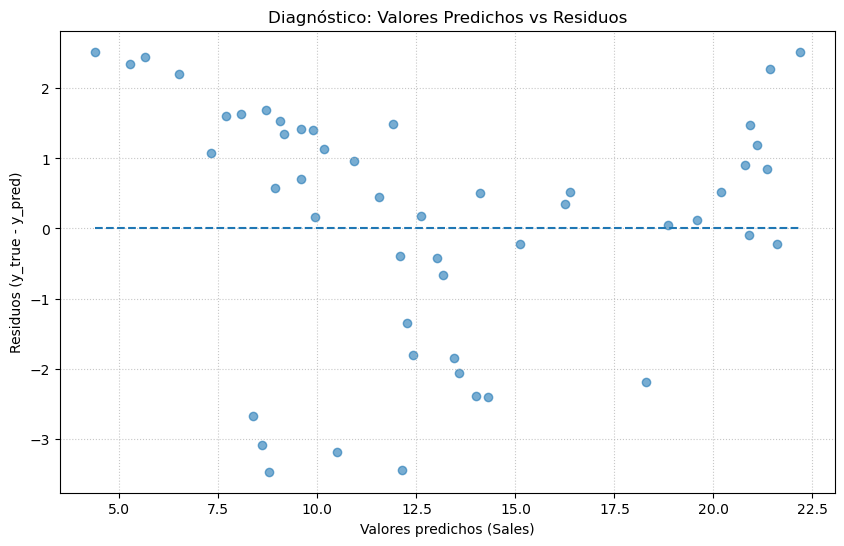

In [17]:
# UNIDAD 1
X, y = generar_cargar_e_inspeccionar_datos()
X_train_scaled, X_test_scaled, y_train, y_test = division_escalamiento(X, y)

# UNIDAD 2
X_train_reg, X_test_reg, y_train_reg, y_test_reg = configuracion_y_revision_datos()
modelo = entrenar_modelo_regresion_lineal_multiple(X_train_reg, y_train_reg)
metricas, y_pred = evaluar_con_metricas_avanzadas(modelo, X_test_reg, y_test_reg)

print("\n--- Resultados Finales del Modelo ---")
print(metricas)

# Gráfico de residuos
diagnostico_visual_residuos(y_test_reg, y_pred)